In [2]:
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import font_manager, rc

import platform

### 한글 font 설정
plt.rc("font", family = "Malgun Gothic")

### 시각화 시 마이너스(-, 음수) 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

In [4]:
df = pd.read_csv("./data/labeled_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       7996 non-null   object 
 1   TimeStamp                 7996 non-null   object 
 2   PART_FACT_PLAN_DATE       7996 non-null   object 
 3   PART_FACT_SERIAL          7996 non-null   int64  
 4   PART_NAME                 7996 non-null   object 
 5   EQUIP_CD                  7996 non-null   object 
 6   EQUIP_NAME                7996 non-null   object 
 7   PassOrFail                7996 non-null   object 
 8   Reason                    71 non-null     object 
 9   Injection_Time            7996 non-null   float64
 10  Filling_Time              7996 non-null   float64
 11  Plasticizing_Time         7996 non-null   float64
 12  Cycle_Time                7996 non-null   float64
 13  Clamp_Close_Time          7996 non-null   float64
 14  Cushion_

In [6]:
data = df.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "Reason", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [7]:
data["PART_NAME"].unique()

array(["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH",
       "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH",
       'SP2 CVR ROOF RACK CTR, RH', "JX1 W/S SIDE MLD'G RH"], dtype=object)

In [8]:
rg3 = data[(data["PART_NAME"] == "RG3 MOLD'G W/SHLD, LH") | (data["PART_NAME"] == "RG3 MOLD'G W/SHLD, RH")].copy()

In [9]:
rg3 = rg3.drop(columns=["PART_NAME"])

In [10]:
# rg3 = rg3.drop(columns=["Filling_Time","Plasticizing_Time","Cycle_Time","Plasticizing_Position", "Clamp_Open_Position", "Max_Injection_Speed",
#                           "Max_Switch_Over_Pressure","Max_Back_Pressure", "Barrel_Temperature_2", "Barrel_Temperature_3","Barrel_Temperature_5",
#                           "Barrel_Temperature_6", "Mold_Temperature_4"])

In [11]:
rg3 = rg3.replace('Y', 1).replace('N', 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17148\2593351293.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rg3 = rg3.replace('Y', 1).replace('N', 0)


In [12]:
rg3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1256 entries, 1211 to 5231
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                1256 non-null   int64  
 1   Injection_Time            1256 non-null   float64
 2   Filling_Time              1256 non-null   float64
 3   Plasticizing_Time         1256 non-null   float64
 4   Cycle_Time                1256 non-null   float64
 5   Clamp_Close_Time          1256 non-null   float64
 6   Cushion_Position          1256 non-null   float64
 7   Plasticizing_Position     1256 non-null   float64
 8   Clamp_Open_Position       1256 non-null   float64
 9   Max_Injection_Speed       1256 non-null   float64
 10  Max_Screw_RPM             1256 non-null   float64
 11  Average_Screw_RPM         1256 non-null   float64
 12  Max_Injection_Pressure    1256 non-null   float64
 13  Max_Switch_Over_Pressure  1256 non-null   float64
 14  Max_Back_P

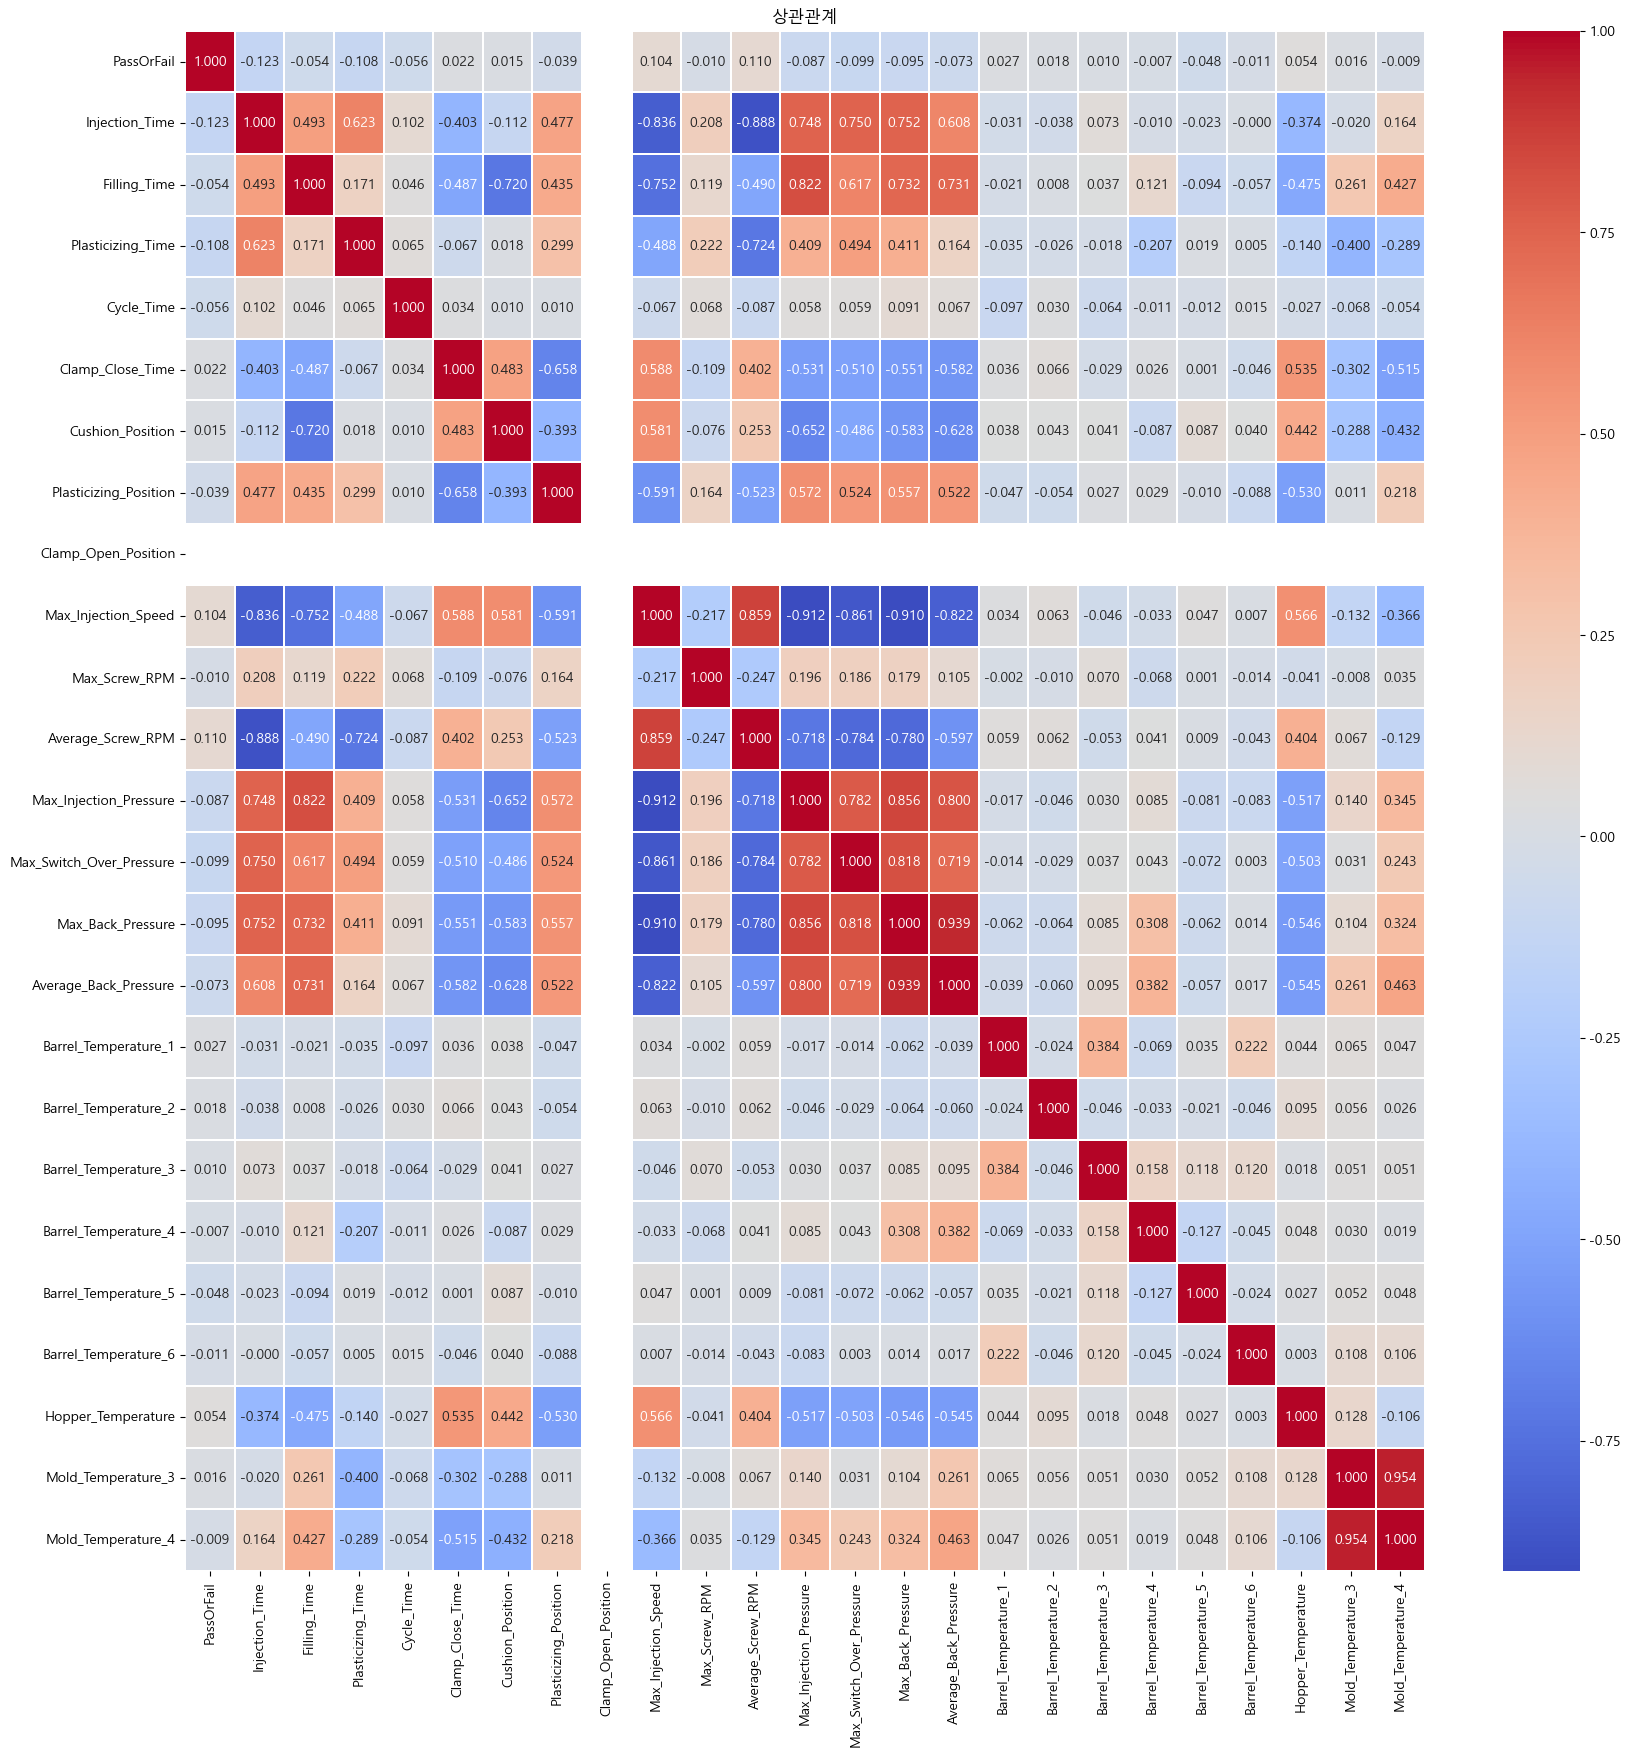

In [13]:
plt.figure(figsize=(20,20))
# 제목
plt.title("상관관계")
### 히트맵 시각화
# - linewidths=0.5 : 각 사각형 사이의 경계선 두께
sns.heatmap(rg3.corr(), annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.3)
# 그리기
plt.show()

In [14]:
df2 = df.copy()

[1 0]


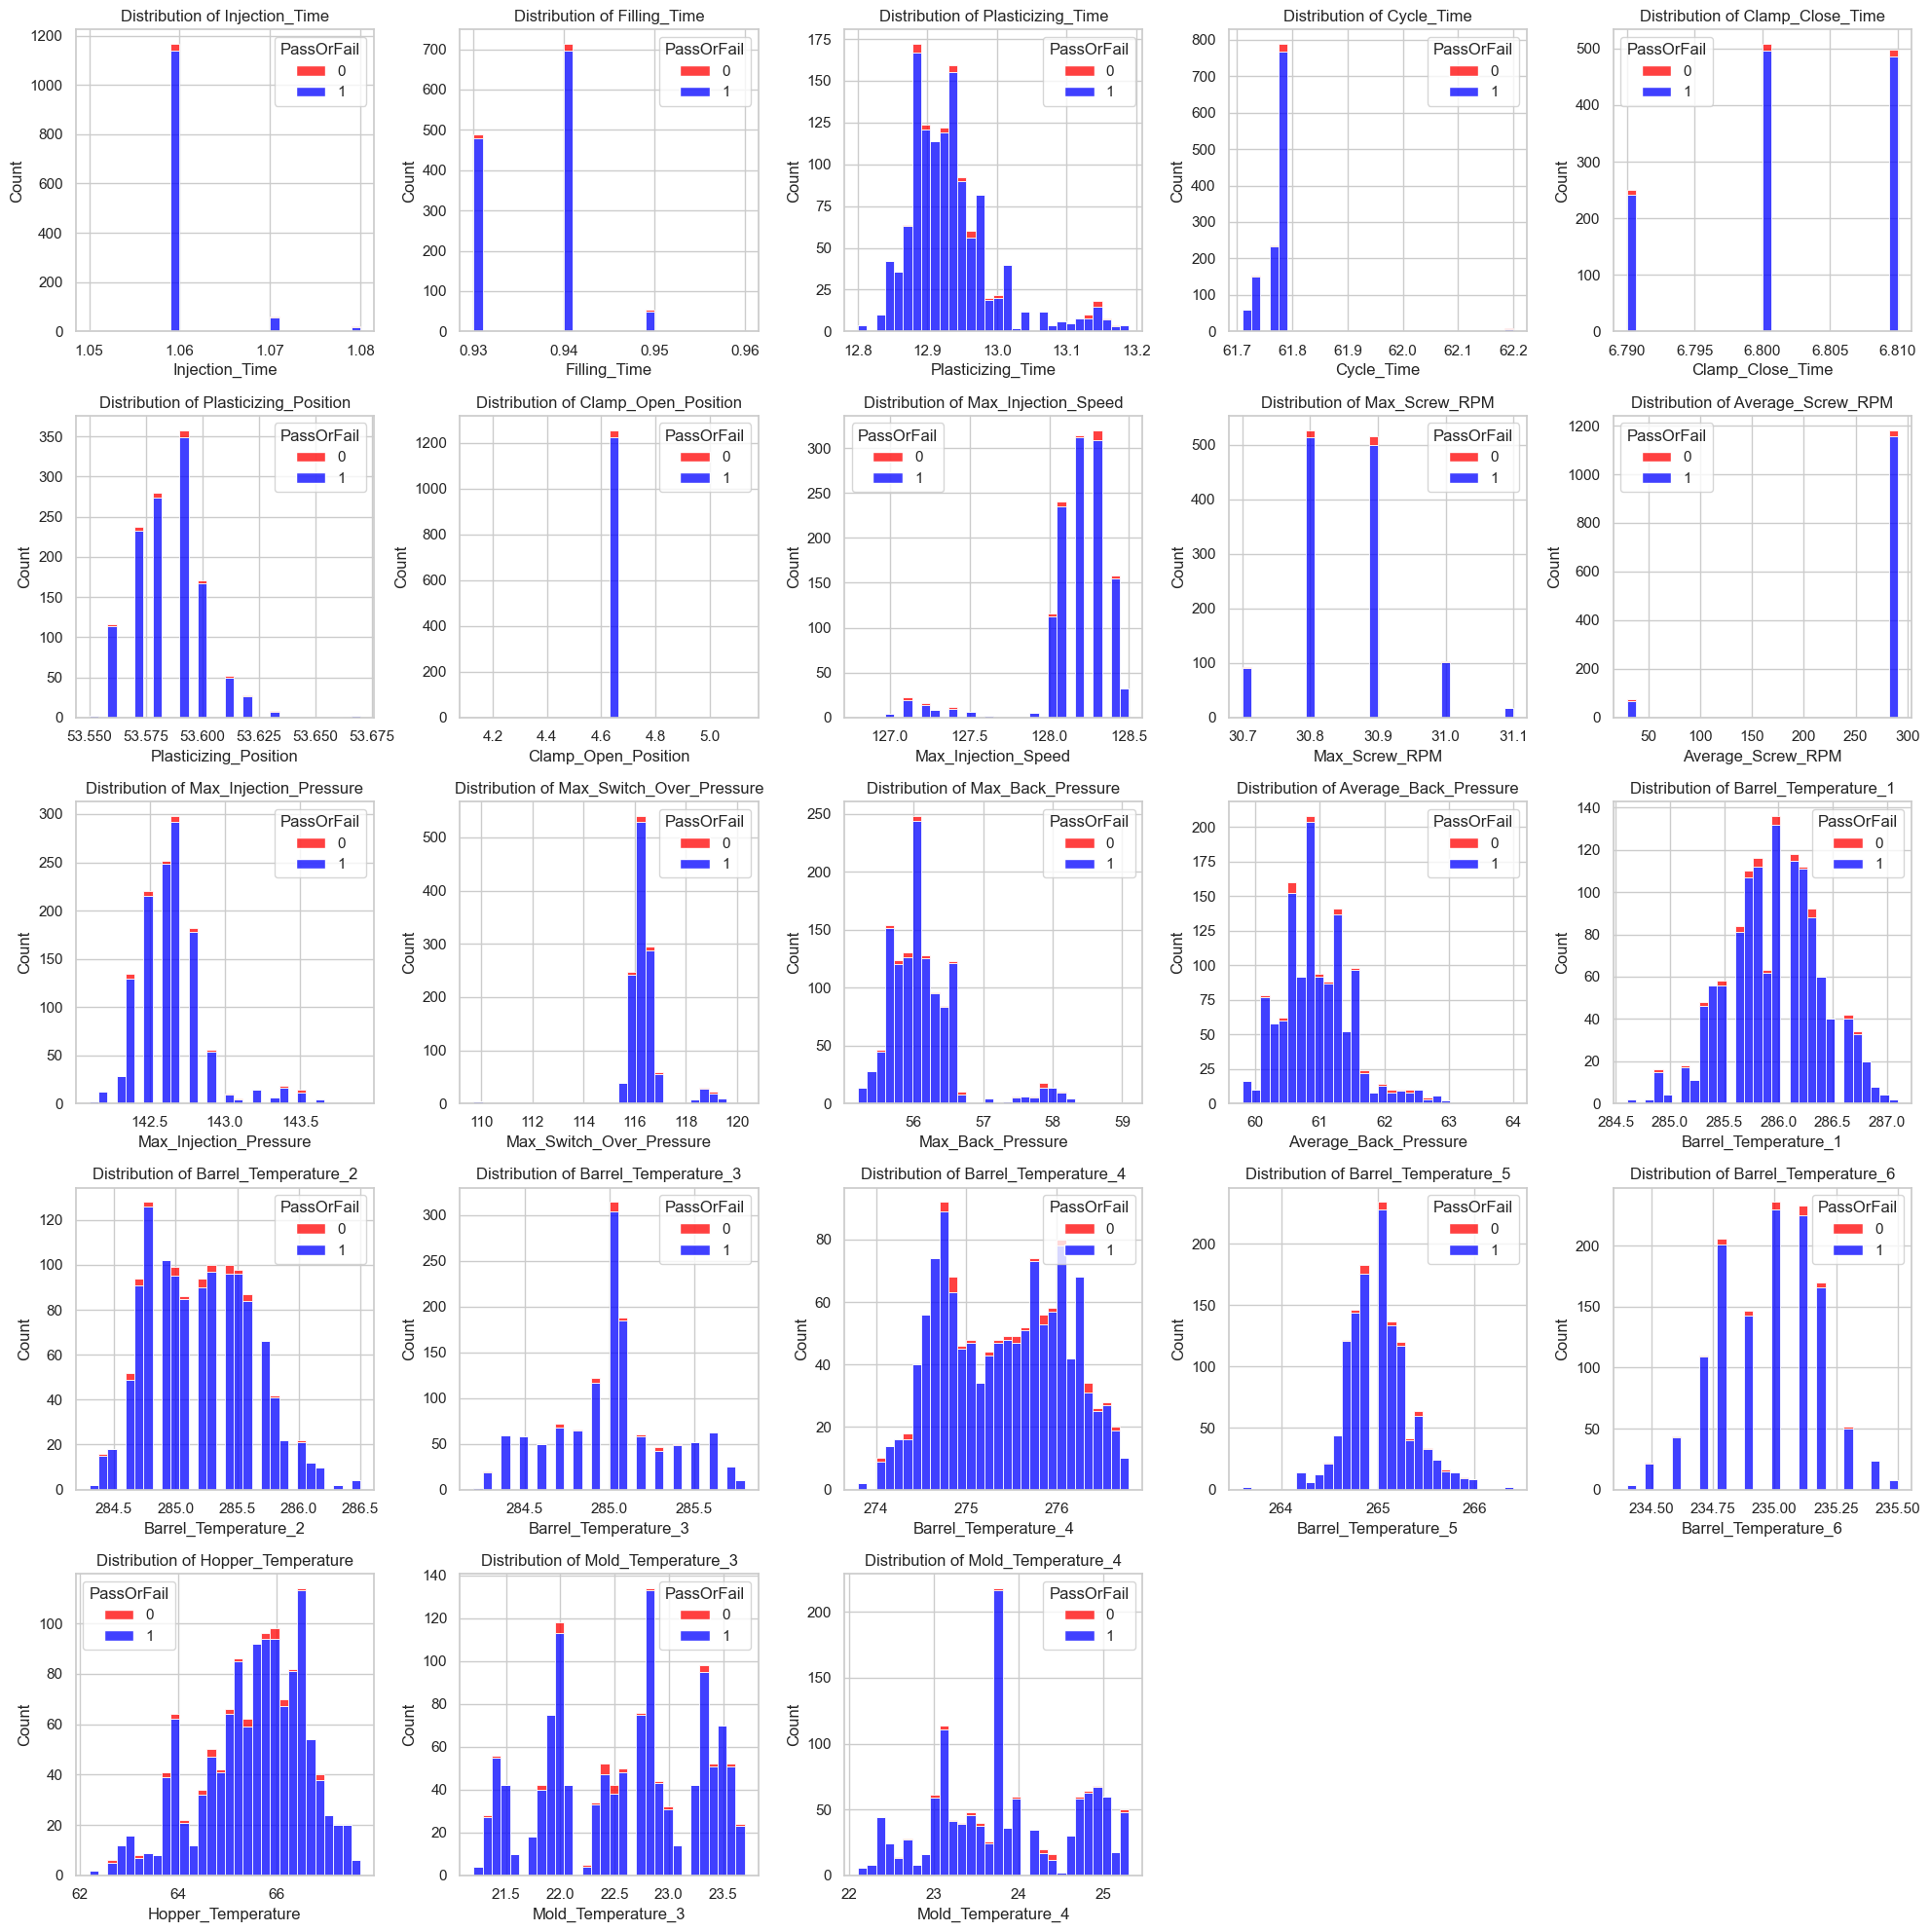

In [15]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PassOrFail 열 값 확인
print(rg3['PassOrFail'].unique())  # 고유값 확인


# 컬럼 리스트 가져오기 (PassOrFail 제외)
columns = [
    "Injection_Time", "Filling_Time", "Plasticizing_Time", "Cycle_Time",
    "Clamp_Close_Time", "Plasticizing_Position",
    "Clamp_Open_Position", "Max_Injection_Speed", "Max_Screw_RPM",
    "Average_Screw_RPM", "Max_Injection_Pressure", "Max_Switch_Over_Pressure",
    "Max_Back_Pressure", "Average_Back_Pressure", "Barrel_Temperature_1",
    "Barrel_Temperature_2", "Barrel_Temperature_3", "Barrel_Temperature_4",
    "Barrel_Temperature_5", "Barrel_Temperature_6", "Hopper_Temperature",
    "Mold_Temperature_3", "Mold_Temperature_4"
]

# 그래프 스타일 설정
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))

# 각 변수에 대해 서브플롯 생성
for i, col in enumerate(columns):
    plt.subplot(5, 5, i + 1)  # 5x5 그리드로 서브플롯 생성
    sns.histplot(
        data=rg3, x=col, hue="PassOrFail", multiple="stack",
        palette={0: 'red', 1: 'blue'}, kde=False, bins=30
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

# 전체 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()


In [18]:
rg3[rg3["Average_Screw_RPM"] < 100]["PassOrFail"].value_counts()

PassOrFail
1    67
0     7
Name: count, dtype: int64

In [ ]:
sns.histplot(
    data=rg3, x=col, hue="PassOrFail", multiple="stack",
    palette={0: 'red', 1: 'blue'}, kde=False, bins=30
)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

In [15]:
rg3 = rg3.drop(columns=["Cushion_Position"])
rg3 = rg3.drop(columns=["Clamp_Open_Position"])

In [16]:
from sklearn.model_selection import train_test_split

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd


In [17]:
y = rg3["PassOrFail"]
X = rg3.drop(columns=["PassOrFail"])

In [18]:
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(1004, 22) (252, 22)
(1004,) (252,)


In [19]:
# X_val, X_test, y_val, y_test  = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)
# print(X_val.shape, X_test.shape)
# print(y_val.shape, y_test.shape)

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)
# X_test_scaled=ss.transform(X_test)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

grid_df = pd.DataFrame()
# GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
for model in model_list:
    model_name = model.__class__.__name__
    gridParams = dict()
    if model_name =="XGBClassifier" :
        gridParams["n_estimators"] = [20,50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_child_weight"] = [1, 2,4]
    elif model_name == "HistGradientBoostingClassifier" :
        gridParams["max_iter"] = [20, 50]
        gridParams["max_depth"] = [10, 50]
        gridParams["min_samples_leaf"] = [1,2,4]
    else :
        gridParams["n_estimators"] = [20, 50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_samples_split"] = [2,5,10]
        gridParams["min_samples_leaf"] = [1,2,4]

    grid_search_model = GridSearchCV(model, gridParams, scoring='f1', cv=5, n_jobs=-1)
    grid_search_model.fit(X_train_scaled, y_train)
    model = grid_search_model.best_estimator_
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    
    pre = precision_score(y_val, val_pred)
    rec = recall_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred)
    df_temp = pd.DataFrame([[model_name,  train_acc, val_acc, pre, rec, f1, train_acc-val_acc, str(grid_search_model.best_params_)]],
                             columns=["모델명", "훈련_정확도", "검증_정확도", "정밀도", "재현율", "f1-score", "훈련-검증", "파라미터"])
    grid_df = pd.concat([grid_df, df_temp], ignore_index=True)
grid_df

NameError: name 'X_train_scaled' is not defined

In [22]:
grid_df["파라미터"][0]

"{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}"

In [23]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20)
model.fit(X_train_scaled, y_train)

val_pre = model.predict(X_val_scaled)
# test_pre = model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, val_pre)


array([[  0,   6],
       [  0, 246]], dtype=int64)

In [24]:
# confusion_matrix(y_test, test_pre)